In [25]:
import geopandas as gpd 

In [47]:
gdf_wards = gpd.read_parquet('data/Jaipur_Wards.geoparquet')
gdf_wards.to_crs('EPSG:4326', inplace=True)

In [27]:
gdf_muni_bound = gdf_wards.dissolve().exterior.unary_union
gdf_muni_bound = gpd.GeoSeries([gdf_muni_bound])

In [48]:
gdf_wards['ward_no'] = gdf_wards.Ward_No.fillna(gdf_wards.Ward_Numbe).astype(int)
gdf_wards['area_no'] = gdf_wards['AREA'].fillna(gdf_wards['Area']).astype(int)
gdf_wards = gdf_wards[['NAME', 'ward_no', 'area_no','POP','DENS_PPH','geometry']]
gdf_wards = gdf_wards.rename(columns={'NAME': 'name', 'POP': 'population', 'DENS_PPH': 'density'})
gdf_wards

,name,ward_no,area_no,population,density,geometry
0,ADARSH NAGAR,99,781,12356,16,"POLYGON ((75.88775 26.91272, 75.88689 26.90841..."
1,ADARSH NAGAR,76,234,14120,60,"MULTIPOLYGON (((75.86151 26.94722, 75.86151 26..."
2,ADARSH NAGAR,77,18,13879,771,"POLYGON ((75.84494 26.92797, 75.84549 26.92467..."
3,ADARSH NAGAR,77,23,0,0,"POLYGON ((75.84566 26.92336, 75.84724 26.92143..."
4,ADARSH NAGAR,78,112,14967,134,"POLYGON ((75.85290 26.92419, 75.85029 26.92400..."
...,...,...,...,...,...,...
246,VIDHYADHAR NAGAR,38,83,11607,140,"POLYGON ((75.75698 26.93760, 75.76194 26.94210..."
247,VIDHYADHAR NAGAR,39,82,12154,148,"POLYGON ((75.73230 26.94246, 75.73732 26.94226..."
248,VIDHYADHAR NAGAR,40,59,11353,192,"POLYGON ((75.75369 26.93463, 75.75298 26.93490..."
249,VIDHYADHAR NAGAR,41,81,11771,145,"POLYGON ((75.73652 26.93337, 75.74409 26.93448..."


In [ ]:
gdf_wards[gdf_wards.duplicated(subset=['ward_no','area_no'], keep=False)]
# there is dupplicate

,name,ward_no,area_no,population,density,geometry
54,CIVIL LINES,32,73,15579,213,"POLYGON ((75.79829 26.94583, 75.79647 26.94505..."
212,VIDHYADHAR NAGAR,32,73,10594,145,"POLYGON ((75.73318 26.95155, 75.74483 26.94970..."


<Axes: title={'center': 'Population Distribution by Ward'}, ylabel='Frequency'>

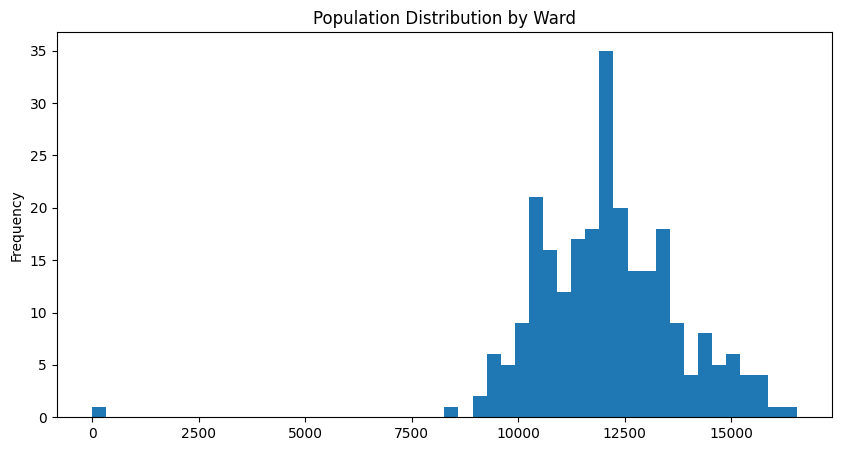

In [66]:
gdf_wards.population.plot(kind='hist', bins=50, figsize=(10, 5), title='Population Distribution by Ward')

In [64]:
# Create a column for name+ward_no+area_no as a unique identifier
gdf_wards['name_unique'] = gdf_wards['name'] + ' - Ward ' + gdf_wards['ward_no'].astype(str) + ' - Area ' + gdf_wards['area_no'].astype(str)
gdf_wards

,name,ward_no,area_no,population,density,geometry,name_unique
0,ADARSH NAGAR,99,781,12356,16,"POLYGON ((75.88775 26.91272, 75.88689 26.90841...",ADARSH NAGAR - Ward 99 - Area 781
1,ADARSH NAGAR,76,234,14120,60,"MULTIPOLYGON (((75.86151 26.94722, 75.86151 26...",ADARSH NAGAR - Ward 76 - Area 234
2,ADARSH NAGAR,77,18,13879,771,"POLYGON ((75.84494 26.92797, 75.84549 26.92467...",ADARSH NAGAR - Ward 77 - Area 18
3,ADARSH NAGAR,77,23,0,0,"POLYGON ((75.84566 26.92336, 75.84724 26.92143...",ADARSH NAGAR - Ward 77 - Area 23
4,ADARSH NAGAR,78,112,14967,134,"POLYGON ((75.85290 26.92419, 75.85029 26.92400...",ADARSH NAGAR - Ward 78 - Area 112
...,...,...,...,...,...,...,...
246,VIDHYADHAR NAGAR,38,83,11607,140,"POLYGON ((75.75698 26.93760, 75.76194 26.94210...",VIDHYADHAR NAGAR - Ward 38 - Area 83
247,VIDHYADHAR NAGAR,39,82,12154,148,"POLYGON ((75.73230 26.94246, 75.73732 26.94226...",VIDHYADHAR NAGAR - Ward 39 - Area 82
248,VIDHYADHAR NAGAR,40,59,11353,192,"POLYGON ((75.75369 26.93463, 75.75298 26.93490...",VIDHYADHAR NAGAR - Ward 40 - Area 59
249,VIDHYADHAR NAGAR,41,81,11771,145,"POLYGON ((75.73652 26.93337, 75.74409 26.93448...",VIDHYADHAR NAGAR - Ward 41 - Area 81


Number of wards: 150
Number of areas: 157


<Axes: >

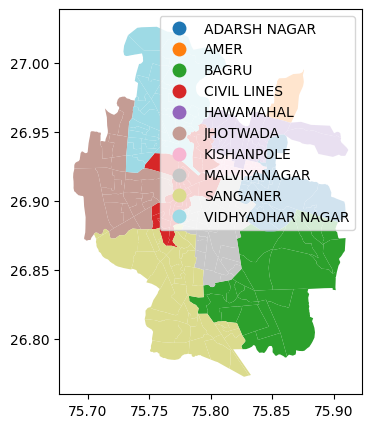

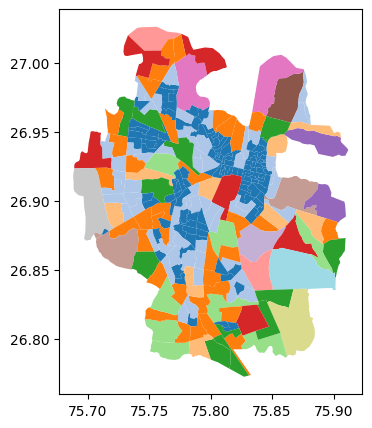

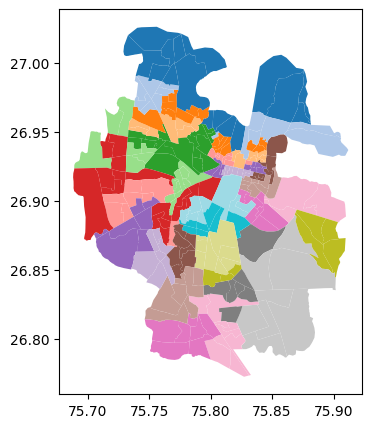

In [49]:
print('Number of wards:', gdf_wards['ward_no'].nunique())
print('Number of areas:', gdf_wards['area_no'].nunique())

gdf_wards.plot(column='name', cmap='tab20', figsize=(5, 5),legend=True)
gdf_wards.plot(column='area_no', cmap='tab20', figsize=(5, 5))
gdf_wards.plot(column='ward_no', cmap='tab20', figsize=(5, 5))

In [65]:
gdf_wards.to_file('../../public/data/mapMain/jaipur_wards.geojson', driver='GeoJSON')
gdf_muni_bound.to_file('../../public/data/mapMain/jaipur_muni_bounds.geojson', driver='GeoJSON')